# Data ingestion and validation

... testing for data

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
#! pip install great_expectations

In [28]:
import pandas as pd
import great_expectations as ge
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Data source: http://www.fao.org/faostat/en/#home

In [27]:
#! wget https://raw.githubusercontent.com/great-expectations/great_expectations/develop/examples/data/FAO-Rice-Production-Asia.csv
! wget https://raw.githubusercontent.com/great-expectations/great_expectations/develop/examples/data/Titanic.csv

--2019-08-21 13:03:13--  https://raw.githubusercontent.com/great-expectations/great_expectations/develop/examples/data/Titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.0.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70366 (69K) [text/plain]
Saving to: ‘Titanic.csv’

Titanic.csv         100%[===================>]  68.72K  --.-KB/s    in 0.02s   

2019-08-21 13:03:13 (2.80 MB/s) - ‘Titanic.csv’ saved [70366/70366]



In [30]:
titanic_df = ge.read_csv("Titanic.csv")

In [31]:
titanic_df.head()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


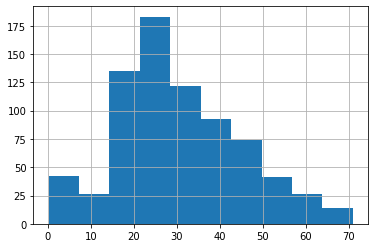

In [33]:
titanic_df.Age.hist();

In [34]:
titanic_df.expect_column_mean_to_be_between("Age", 20,40)

{'success': True,
 'result': {'observed_value': 30.397989417989415,
  'element_count': 1313,
  'missing_count': 557,
  'missing_percent': 0.4242193450114242}}

In [35]:
titanic_df.expect_column_values_to_be_between("Age", 0,80)

{'success': True,
 'result': {'element_count': 1313,
  'missing_count': 557,
  'missing_percent': 0.4242193450114242,
  'unexpected_count': 0,
  'unexpected_percent': 0.0,
  'unexpected_percent_nonmissing': 0.0,
  'partial_unexpected_list': []}}

In [36]:
titanic_df.expect_column_values_to_match_regex('Name', '[A-Z][a-z]+(?: \([A-Z][a-z]+\))?, ', mostly=.95)

{'success': True,
 'result': {'element_count': 1313,
  'missing_count': 0,
  'missing_percent': 0.0,
  'unexpected_count': 3,
  'unexpected_percent': 0.002284843869002285,
  'unexpected_percent_nonmissing': 0.002284843869002285,
  'partial_unexpected_list': ['Downton (?Douton), Mr William James',
   'Jacobsohn Mr Samuel',
   'Seman Master Betros']}}

In [37]:
titanic_df.expect_column_values_to_be_in_set('Sex', ['male', 'female'])

{'success': True,
 'result': {'element_count': 1313,
  'missing_count': 0,
  'missing_percent': 0.0,
  'unexpected_count': 0,
  'unexpected_percent': 0.0,
  'unexpected_percent_nonmissing': 0.0,
  'partial_unexpected_list': []}}

In [38]:
titanic_df.expect_column_values_to_be_in_set('Survived', [1, 0])

{'success': True,
 'result': {'element_count': 1313,
  'missing_count': 0,
  'missing_percent': 0.0,
  'unexpected_count': 0,
  'unexpected_percent': 0.0,
  'unexpected_percent_nonmissing': 0.0,
  'partial_unexpected_list': []}}

In [39]:
titanic_df.expect_column_values_to_be_in_set('PClass', ['1st', '2nd', '3rd'])

{'success': False,
 'result': {'element_count': 1313,
  'missing_count': 0,
  'missing_percent': 0.0,
  'unexpected_count': 1,
  'unexpected_percent': 0.0007616146230007616,
  'unexpected_percent_nonmissing': 0.0007616146230007616,
  'partial_unexpected_list': ['*']}}

In [41]:
print(json.dumps(titanic_df.get_expectation_suite(), indent=2))
# titanic_df.save_expectation_suite('titanic_expectations.json')

{
  "data_asset_name": null,
  "expectation_suite_name": "default",
  "meta": {
    "great_expectations.__version__": "0.7.7"
  },
  "expectations": [
    {
      "expectation_type": "expect_column_mean_to_be_between",
      "kwargs": {
        "column": "Age",
        "min_value": 20,
        "max_value": 40
      }
    },
    {
      "expectation_type": "expect_column_values_to_be_between",
      "kwargs": {
        "column": "Age",
        "min_value": 0,
        "max_value": 80
      }
    },
    {
      "expectation_type": "expect_column_values_to_match_regex",
      "kwargs": {
        "column": "Name",
        "regex": "[A-Z][a-z]+(?: \\([A-Z][a-z]+\\))?, ",
        "mostly": 0.95
      }
    },
    {
      "expectation_type": "expect_column_values_to_be_in_set",
      "kwargs": {
        "column": "Sex",
        "value_set": [
          "male",
          "female"
        ]
      }
    },
    {
      "expectation_type": "expect_column_values_to_be_in_set",
      "kwargs": {
    

In [44]:
print(json.dumps(titanic_df.get_expectation_suite(), indent=2))

{
  "data_asset_name": null,
  "expectation_suite_name": "default",
  "meta": {
    "great_expectations.__version__": "0.7.7"
  },
  "expectations": [
    {
      "expectation_type": "expect_column_mean_to_be_between",
      "kwargs": {
        "column": "Age",
        "min_value": 20,
        "max_value": 40
      }
    },
    {
      "expectation_type": "expect_column_values_to_be_between",
      "kwargs": {
        "column": "Age",
        "min_value": 0,
        "max_value": 80
      }
    },
    {
      "expectation_type": "expect_column_values_to_match_regex",
      "kwargs": {
        "column": "Name",
        "regex": "[A-Z][a-z]+(?: \\([A-Z][a-z]+\\))?, ",
        "mostly": 0.95
      }
    },
    {
      "expectation_type": "expect_column_values_to_be_in_set",
      "kwargs": {
        "column": "Sex",
        "value_set": [
          "male",
          "female"
        ]
      }
    },
    {
      "expectation_type": "expect_column_values_to_be_in_set",
      "kwargs": {
    

In [16]:
df = ge.read_csv('FAO-Rice-Production-Asia.csv')
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1961,1961,hg/ha,15190,Fc,Calculated data
1,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1962,1962,hg/ha,15190,Fc,Calculated data
2,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1963,1963,hg/ha,15190,Fc,Calculated data
3,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1964,1964,hg/ha,17273,Fc,Calculated data
4,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1965,1965,hg/ha,17273,Fc,Calculated data


In [17]:
pivoted = df.pivot(index='Year', columns='Area', values='Value')
pivoted.head()

Area,Afghanistan,Azerbaijan,Bangladesh,Bhutan,Brunei Darussalam,Cambodia,"China, Hong Kong SAR","China, Taiwan Province of","China, mainland",Democratic People's Republic of Korea,...,Saudi Arabia,Sri Lanka,Syrian Arab Republic,Tajikistan,Thailand,Timor-Leste,Turkey,Turkmenistan,Uzbekistan,Viet Nam
Year,,,,,,,,,,,,,,,,,,,,,
1961,15190.0,NaN,17005.0,20000.0,17306.0,10921.0,20168.0,32663.0,20434.0,43071.0,...,28000.0,18626.0,25000.0,NaN,16585.0,19949.0,39542.0,NaN,NaN,18966.0
1962,15190.0,NaN,15302.0,20000.0,18527.0,8920.0,17201.0,33723.0,23408.0,43116.0,...,26500.0,19539.0,26100.0,NaN,17202.0,17000.0,33951.0,NaN,NaN,19937.0
1963,15190.0,NaN,17690.0,20000.0,13711.0,11742.0,18408.0,33583.0,26642.0,46056.0,...,28492.0,19547.0,24473.0,NaN,18725.0,15385.0,39400.0,NaN,NaN,21400.0
1964,17273.0,NaN,17070.0,20000.0,13235.0,11611.0,13962.0,37244.0,28062.0,45335.0,...,25000.0,19962.0,20000.0,NaN,18384.0,13652.0,47629.0,NaN,NaN,19441.0
1965,17273.0,NaN,16827.0,20000.0,11737.0,10666.0,24362.0,38454.0,29441.0,39688.0,...,23333.0,17696.0,19091.0,NaN,17805.0,16599.0,43340.0,NaN,NaN,19414.0


In [20]:
df = ge.from_pandas(pivoted)
df.expect_column_mean_to_be_between('Afghanistan', 15000, 25000)

{'success': True,
 'result': {'observed_value': 21998.314814814814,
  'element_count': 54,
  'missing_count': 0,
  'missing_percent': 0.0}}

In [21]:
for column in df.columns:
    #print('Column: ' + column + "\nResult: " + str(df.expect_column_mean_to_be_between(column, 15000, 25000)))
    result = df.expect_column_mean_to_be_between(column, 15000, 25000)
    if (result['success'] == False):
        print(column)
        print(result)

Azerbaijan
{'success': False, 'result': {'observed_value': 31669.82608695652, 'element_count': 54, 'missing_count': 31, 'missing_percent': 0.5740740740740741}}
Bangladesh
{'success': False, 'result': {'observed_value': 26318.537037037036, 'element_count': 54, 'missing_count': 0, 'missing_percent': 0.0}}
Brunei Darussalam
{'success': False, 'result': {'observed_value': 14196.796296296296, 'element_count': 54, 'missing_count': 0, 'missing_percent': 0.0}}
China, Taiwan Province of
{'success': False, 'result': {'observed_value': 49080.055555555555, 'element_count': 54, 'missing_count': 0, 'missing_percent': 0.0}}
China, mainland
{'success': False, 'result': {'observed_value': 49688.81481481482, 'element_count': 54, 'missing_count': 0, 'missing_percent': 0.0}}
Democratic People's Republic of Korea
{'success': False, 'result': {'observed_value': 42581.22222222222, 'element_count': 54, 'missing_count': 0, 'missing_percent': 0.0}}
Indonesia
{'success': False, 'result': {'observed_value': 36438

In [22]:
import json

In [23]:
print(json.dumps(df.get_expectation_suite(), indent = 2))


{
  "data_asset_name": null,
  "expectation_suite_name": "default",
  "meta": {
    "great_expectations.__version__": "0.7.7"
  },
  "expectations": [
    {
      "expectation_type": "expect_column_mean_to_be_between",
      "kwargs": {
        "column": "Afghanistan",
        "min_value": 15000,
        "max_value": 25000
      }
    },
    {
      "expectation_type": "expect_column_mean_to_be_between",
      "kwargs": {
        "column": "Bhutan",
        "min_value": 15000,
        "max_value": 25000
      }
    },
    {
      "expectation_type": "expect_column_mean_to_be_between",
      "kwargs": {
        "column": "Cambodia",
        "min_value": 15000,
        "max_value": 25000
      }
    },
    {
      "expectation_type": "expect_column_mean_to_be_between",
      "kwargs": {
        "column": "China, Hong Kong SAR",
        "min_value": 15000,
        "max_value": 25000
      }
    },
    {
      "expectation_type": "expect_column_mean_to_be_between",
      "kwargs": {
      